In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_db = 'studentsperformance'
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()

** Task **
1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

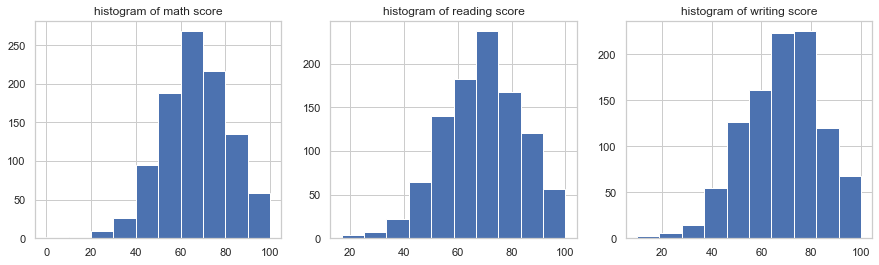

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.hist(student_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(student_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(student_df["writing score"])
plt.title("histogram of writing score")

plt.show()

In [5]:
# Use jarque_bera and normaltest for normal distribution
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


Large test statistics in J-B test suggests the distribution is **not** normal.  Normality test with p< 0.01 shows the distribution is **not** normal.  

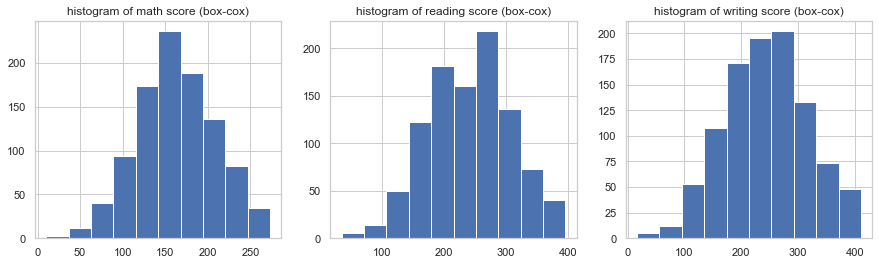

In [6]:
# boxcox transformation
from scipy.stats import boxcox

math_score_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(student_df["reading score"])
writing_score_boxcox,_ = boxcox(student_df["writing score"])

plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox)")

plt.show()

The distributions of the exam performances were left skewed.  After using Box-cox, the two tails become balanced.  We can use Jarque-Bera and Normal test to see if they are normally distributed again. 

In [7]:
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


After box-cox transformation, the J-B test shows the data are normally distributed (p>0.05).  The normality test shows that math score and reading score are normal (p >0.05),  while writing score becomes more normal (p=0.044).  

# Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

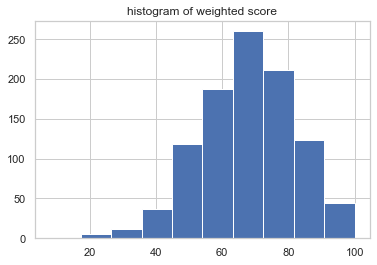

Jarque-Bera test statistics is 15.946036599134201 and p value is 0.0003446371961682848
Normality test statistics is 15.656459097586792 and p value is 0.00039833008034684475


In [8]:
student_df["weighted_score"]=0.4*student_df["math score"]+0.3*student_df["reading score"]+0.3*student_df["writing score"]
plt.hist(student_df["weighted_score"])
plt.title("histogram of weighted score")
plt.show()

jb_stats = jarque_bera(student_df["weighted_score"])
norm_stats = normaltest(student_df["weighted_score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The new weighted score is not normally distributed.  

In [9]:
weighted_score_boxcox,_ = boxcox(student_df["weighted_score"])

jb_stats = jarque_bera(weighted_score_boxcox)
norm_stats = normaltest(weighted_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.172054577951982 and p value is 0.3375548413517593
Normality test statistics is 2.422363974345366 and p value is 0.29784502229339194


The transformed distribution is normal.  

# Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

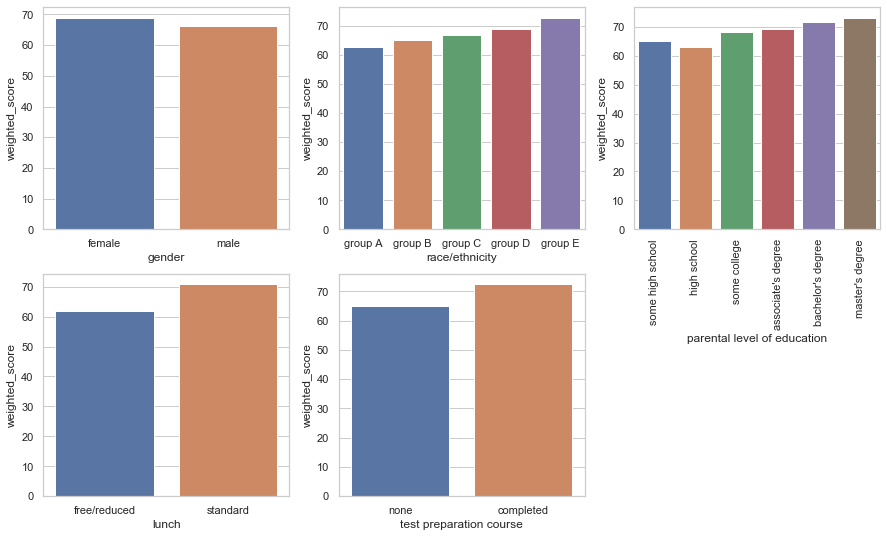

In [10]:
plt.figure(figsize=(15,9))

plt.subplot(2, 3, 1)
student_grouped = student_df.groupby("gender").mean()
student_grouped.reset_index(inplace=True)
sns.barplot(x="gender", y="weighted_score", data=student_grouped)

plt.subplot(2, 3, 2)
student_grouped = student_df.groupby("race/ethnicity").mean()
student_grouped.reset_index(inplace=True)
sns.barplot(x="race/ethnicity", y="weighted_score", data=student_grouped)

plt.subplot(2, 3, 3)
student_grouped = student_df.groupby("parental level of education").mean()
student_grouped.reset_index(inplace=True)
sns.barplot(x="parental level of education", y="weighted_score", 
            order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], data=student_grouped)
plt.xticks(rotation =90)

plt.subplot(2, 3, 4)
student_grouped = student_df.groupby("lunch").mean()
student_grouped.reset_index(inplace=True)
sns.barplot(x="lunch", y="weighted_score", data=student_grouped)

plt.subplot(2, 3, 5)
student_grouped = student_df.groupby("test preparation course").mean()
student_grouped.reset_index(inplace=True)
sns.barplot(x="test preparation course", y="weighted_score", order=["none", "completed"], data=student_grouped)

plt.show()

Visualization shows that all of the variables may be associated with the weighted score (target).  Female students performs better than male. Performance gets better from group A to group E.  The higher parental education, the better in student's performance.  Students with Standard lunch perform better.  Students complete test preparation course have higher scores. T-test or ANOVA test may be required to confirm these findings.   